# Homework 3 - 2D Cellular Automata

Upload the completed notebook with *firstname_lastname-HW3*.

Remember: code needs to be implemented in your own words. No copy-pasting. 

## Excercise 1 

Build an `update` function that takes a numpy array of 0s and 1s and implements the game of life rules on it using wrap-around boundary conditions. 


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

#Define the update function and create the shape of the universe, as well as, create a new universe where cells will be placed after update

def update(x):
    rows, cols = x.shape
    xnew = np.zeros(x.shape)
    
    #Find the number of living cells around home cell and impose wrap around conditions (Moore neighborhood)
    for i, j in np.ndindex(x.shape):
        #Sum the living cells within the universe
        total = (x[i, (j-1)%rows] #left
                + x[i, (j+1)%rows] #right
                + x[(i-1)%cols, j] #up
                + x[(i+1)%cols, j] #bottom
                + x[(i-1)%cols, (j-1)%rows] #up and to the left
                + x[(i-1)%cols, (j+1)%rows] #up and to the right
                + x[(i+1)%cols, (j-1)%rows] #down and to the left
                + x[(i+1)%cols, (j+1)%rows]) #down and to the right
        
        #Now we implement our rule set
        if x[i, j] == 1: #Examine living cells in the universe
        
            #Deal with death and overpopulation
            if (total < 2) or (total > 3):
                xnew[i, j] = 0
            #Any cell with two or three neighbors will live
            else:
                xnew[i, j] = 1
                
        #What if home cell is dead?
        else:
            if total == 3:
                xnew[i, j] =1
            
            else:
                xnew[i, j]= 0
                
    return xnew
              

## Excercise 2
Use the `plant_seed` function provided to place the follow a glider (also provided) on a 20x20 grid. Animate the glider forward in time 100 generations.  

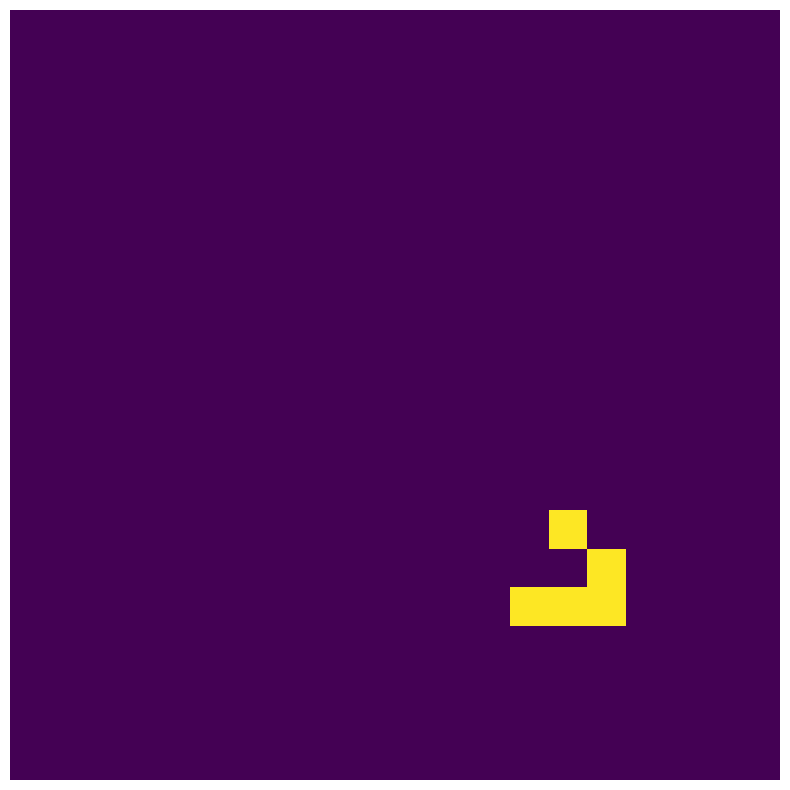

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Corresponding ceiling and plant_seed function for the glider to operate
def ceil(a,b):
    return-(-a//b)

# Construct a function that places the seed into a universe of arbitrary size

def plant_seed(seed, nrows, ncols):
    
    # Create the empty universe that the glider will eventually function in
    soil = np.zeros((nrows, ncols))
    
    # Use the floor and ceil division functions to place the seed into the universe
    rowu = soil.shape[0] // 2 + seed.shape[0]//2
    rowl = ceil(soil.shape[0],2) - ceil(seed.shape[0],2)
                           
    colu = soil.shape[1] // 2 + seed.shape[1] // 2
    coll = ceil(soil.shape[1],2) - ceil(seed.shape[1],2)
    
    
    soil[rowl:rowu, coll:colu] = seed
    planted_seed = soil
                           
    return planted_seed

# Define the glider
glider = np.array([[0, 1, 0], 
                   [0, 0, 1], 
                   [1, 1, 1]])

# Plant the glider seed within the universe 
universe = plant_seed(glider, 20, 20)

# Create animatelife function to simulate glider within the universe
def animatelife(universe, n):
    for i in range(n):
        plt.figure(figsize=(10, 10))
        plt.imshow(update(universe), cmap='viridis')
        plt.axis('off')
        plt.show()
        universe = update(universe)
        clear_output(wait=True)

# Animate the glider
n = 100  # Number of generations
animatelife(universe, n)

    

## Excercise 3

Bacterial populations have been shown to compete in a real-life rock paper scissors game that results in complex dynamics. 

If you want to learn more about this see *Benjamin Kerr, Margaret A. Riley, Marcus W. Feldman & Brendan J. M. Bohannan. Local dispersal promotes biodiversity in a real-life game of rock-paper-scissors*

Simulate these competing bacterial populations using a 3 state, 2D CA where the states are 0, 1, and 2. Use the rock-paper-scissors rule where 1 beats 0, 2 beats 1, and 0 beats 2. 

Make the rule set such that each cell plays against all cells in its neighborhood and adopts the state of any cell that beats it. 

Use the Moore neighborhood (https://en.wikipedia.org/wiki/Moore_neighborhood) and wraparound boundary conditions. 

Simulate both random initial conditions and sectored initial conditions, meaning 3 quadrants of 0,1,2.





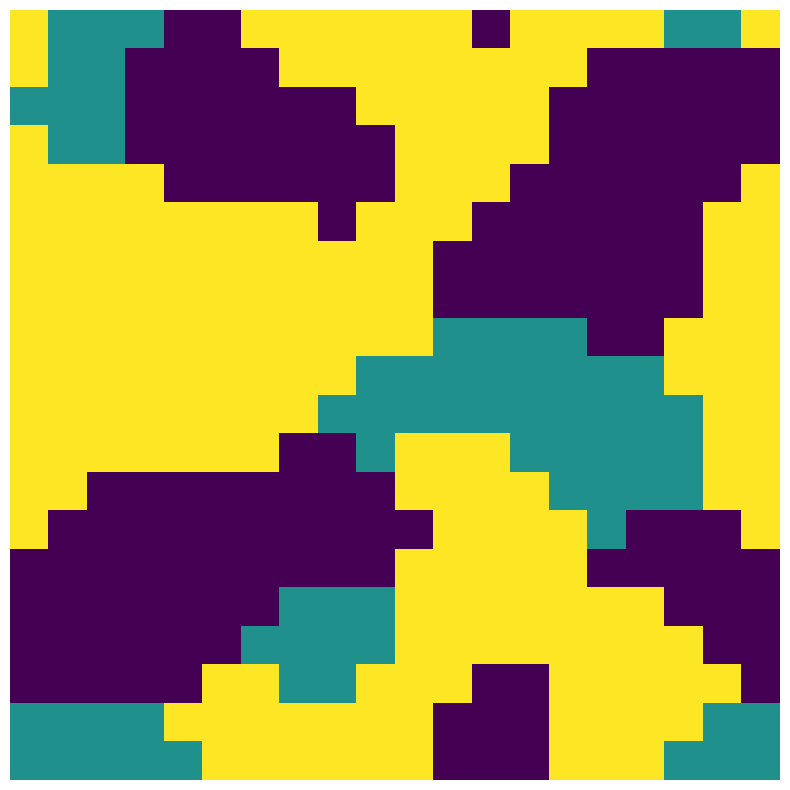

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

# Create an update function that includes a moore neighborhood and applies the rules associated with it
def update(x):
    rows, cols = x.shape
    xnew = np.zeros(x.shape, dtype=int)

    for i in range(rows):
        for j in range(cols):
            current_state = x[i, j]
            states_count = [0, 0, 0]  # Counts of neighbors' states (0, 1, 2)

            # Checking all neighbors in the Moore neighborhood
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue  # Skip the current cell itself
                    neighbor_state = x[(i + di) % rows, 
                                       (j + dj) % cols]
                    states_count[neighbor_state] += 1

            # Determine the state that beats the current one
            winning_state = (current_state + 1) % 3
                    
            # Check if the current state is outnumbered by the winning state
            if states_count[winning_state] > states_count[current_state]:
                xnew[i, j] = winning_state  # Change state if beaten by majority
            else:
                xnew[i, j] = current_state  # Retain the current state if not

    return xnew

# Create animatelife function to simulate rock,paper,scissors rules within the universe
def animatelife(universe, n):
    for i in range(n):
        plt.figure(figsize=(10, 10))
        plt.imshow(update(universe), cmap='viridis')
        plt.axis('off')
        plt.show()
        universe = update(universe)
        clear_output(wait=True)

# Create the universe with random states (0, 1, or 2)
rows, cols = 20, 20
universe = np.random.choice([0, 1, 2], size=(rows, cols))

# Animate the simulation
n = 100  # Number of generations
animatelife(universe, n)


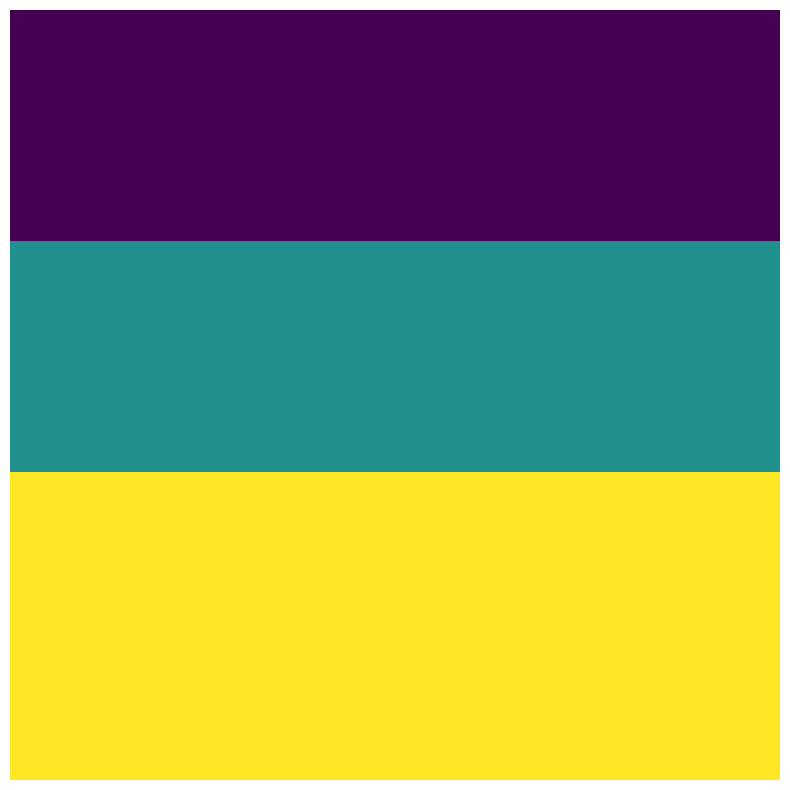

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

# The update function modified for rock-paper-scissors rules
def update(x):
    rows, cols = x.shape
    xnew = np.zeros(x.shape, dtype=int)

    for i in range(rows):
        for j in range(cols):
            current_state = x[i, j]
            states_count = [0, 0, 0]  # Counts of neighbors' states (0, 1, 2)

            # Checking all neighbors
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue  # Skip the current cell itself
                    neighbor_state = x[(i + di) % rows, (j + dj) % cols]
                    states_count[neighbor_state] += 1

                    winning_state = (current_state + 1) % 3  # State that beats the current one
                    
            if states_count[winning_state] > states_count[current_state]:
                xnew[i, j] = winning_state  # Change state if beaten by majority
            else:
                xnew[i, j] = current_state  # Retain the current state


    return xnew

# Create animatelife function to visualize the simulation
def animatelife(universe, n):
    for i in range(n):
        plt.figure(figsize=(10, 10))
        plt.imshow(update(universe), cmap='viridis')
        plt.axis('off')
        plt.show()
        universe = update(universe)
        clear_output(wait=True)

# Create the universe with sectored states (0, 1, or 2)
rows, cols = 20, 20
universe = np.zeros((rows, cols), dtype=int)
sector_size = rows // 3
universe[:sector_size, :] = 0
universe[sector_size:2*sector_size, :] = 1
universe[2*sector_size:, :] = 2

# Animate the simulation
n = 100  # Number of generations
animatelife(universe, n)


# Excercise 4: Extra Credit (Not optional for graduate students)
Review this week's reading entitled *Cellular Automata Approaches to Biological Modeling*.
Implement the Young Model, the coupled oscillator model, or a Growth Automata model (such as diffusion limited aggregation). Comment on how your simulation could be used to increase intuition on the biological phenomenon simulated.


Please state who you worked with: